In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from ydata_profiling import ProfileReport

In [2]:
file = 'df_abc_xyz__2003_2014.csv'
df4eda = pd.read_csv(file, index_col=0)
#df4eda = pd.read_csv(file)
df4eda

,ProductID,Date,Zip,Units,Revenue_T,Manufacturer,Category,Segment,Product,isVanArsdel,...,Year,MonthIndex,City,State,Region,District,ManufacturerID_y,MfgisVanArsdel,abc_class,xyz_class
0,981,2014-12-30,6111,12,31676.40,Natura,Urban,Convenience,Natura UC-44,No,...,2014,192,"Newington, CT",CT,East,District #02,8,No,B,Y
1,1086,2014-12-30,92879,7,11020.59,Pirum,Rural,Productivity,Pirum RP-32,No,...,2014,192,"Corona, CA",CA,West,District #38,10,No,B,Y
2,1085,2014-12-30,92879,7,11020.59,Pirum,Rural,Productivity,Pirum RP-31,No,...,2014,192,"Corona, CA",CA,West,District #38,10,No,B,Y
3,489,2014-12-30,32901,3,35010.36,VanArsdel,Urban,Moderation,Maximus UM-94,Yes,...,2014,192,"Melbourne, FL",FL,East,District #10,7,Yes,A,Y
4,1989,2014-12-30,84770,3,16441.11,Currus,Rural,Select,Currus RS-08,No,...,2014,192,"Saint George, UT",UT,West,District #38,4,No,A,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976497,2388,2003-01-01,11776,1,3716.37,Aliqui,Urban,Convenience,Aliqui UC-36,No,...,2003,49,"Port Jefferson Station, NY",NY,East,District #03,2,No,A,Y
976498,2406,2003-01-01,34293,1,1070.37,Aliqui,Youth,Youth,Aliqui YY-15,No,...,2003,49,"Venice, FL",FL,East,District #10,2,No,C,Y
976499,1086,2003-01-01,84660,1,1070.37,Pirum,Rural,Productivity,Pirum RP-32,No,...,2003,49,"Spanish Fork, UT",UT,West,District #33,10,No,B,X
976500,2396,2003-01-01,16406,1,1070.37,Aliqui,Youth,Youth,Aliqui YY-05,No,...,2003,49,"Conneautville, PA",PA,East,District #13,2,No,A,X


In [3]:
#df = pd.DataFrame()
df4eda[['Model_name', 'Model_id']] = df4eda['Product'].str.split(expand=True)
df4eda['Model_name']

0          Natura
1           Pirum
2           Pirum
3         Maximus
4          Currus
           ...   
976497     Aliqui
976498     Aliqui
976499      Pirum
976500     Aliqui
976501      Pirum
Name: Model_name, Length: 976502, dtype: object

In [4]:
df4eda[['Model_id_index', 'Model_id_number']] = df4eda['Model_id'].str.split(pat="-", expand=True)

In [5]:
df4eda['Model_id_index']

0         UC
1         RP
2         RP
3         UM
4         RS
          ..
976497    UC
976498    YY
976499    RP
976500    YY
976501    RP
Name: Model_id_index, Length: 976502, dtype: object

In [6]:
df4eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976502 entries, 0 to 976501
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ProductID         976502 non-null  int64  
 1   Date              976502 non-null  object 
 2   Zip               976502 non-null  int64  
 3   Units             976502 non-null  int64  
 4   Revenue_T         976502 non-null  float64
 5   Manufacturer      976502 non-null  object 
 6   Category          976502 non-null  object 
 7   Segment           976502 non-null  object 
 8   Product           976502 non-null  object 
 9   isVanArsdel       976502 non-null  object 
 10  IsCompeteHide     976502 non-null  object 
 11  ManufacturerID_x  976502 non-null  int64  
 12  IsCompete         976502 non-null  object 
 13  MonthNo           976502 non-null  int64  
 14  MonthName         976502 non-null  object 
 15  MonthID           976502 non-null  int64  
 16  Month             97

In [7]:
# что с пропущенными значениямми
df4eda.isnull().sum()

ProductID           0
Date                0
Zip                 0
Units               0
Revenue_T           0
Manufacturer        0
Category            0
Segment             0
Product             0
isVanArsdel         0
IsCompeteHide       0
ManufacturerID_x    0
IsCompete           0
MonthNo             0
MonthName           0
MonthID             0
Month               0
Quarter             0
Year                0
MonthIndex          0
City                0
State               0
Region              0
District            0
ManufacturerID_y    0
MfgisVanArsdel      0
abc_class           0
xyz_class           0
Model_name          0
Model_id            0
Model_id_index      0
Model_id_number     0
dtype: int64

In [8]:
# сколько уникальных значений в каждом параметре
df4eda.nunique()

ProductID            1768
Date                 4254
Zip                 31513
Units                  34
Revenue_T            3303
Manufacturer           14
Category                4
Segment                 8
Product              1602
isVanArsdel             2
IsCompeteHide           2
ManufacturerID_x       14
IsCompete               2
MonthNo                12
MonthName              12
MonthID               144
Month                 144
Quarter                 4
Year                   12
MonthIndex            144
City                24103
State                  49
Region                  3
District               39
ManufacturerID_y       14
MfgisVanArsdel          2
abc_class               3
xyz_class               3
Model_name             14
Model_id              598
Model_id_index          9
Model_id_number       100
dtype: int64

In [9]:
df = df4eda.copy()

# удалю Product ID и Product не нужен
df = df.drop(['ProductID', 'Product', 'Model_id', 'Model_name', 'Model_id_index'], axis=1)

# удлаю и то что касается экспиримента по Sentiments
#df = df.drop(['Rolling Period Sort', 'Rolling Period', 'Running Months', 'RunningMonths', 'Running Year'], axis=1)

#MfgisVanArsdel и isVanArsdel - уберу, слишком узкие и специфчные
df = df.drop(['isVanArsdel', 'MfgisVanArsdel'], axis=1)

#City и Region и State и District тоже уберу, оставлю    Zip
df = df.drop(['City', 'Region', 'District' ,'State'], axis=1)

# ManufacturerID_x и ManufacturerID_y тоже уберу, дублирует Manufacturer
df = df.drop(['ManufacturerID_x', 'ManufacturerID_y'], axis=1)

# из привязки ко времени оставлю только номер месяца
df = df.drop(['Month', 'Year', 'MonthIndex', 'Quarter', 'MonthID', 'MonthName', 'Date'], axis=1)

# из показател конкуретности ничего не оставлю они в сильной зависимости от Segments и Category
df = df.drop(['IsCompeteHide'], axis=1)

# из показател конкуретности оставлю явную
#df = df.drop(['IsCompete'], axis=1)

# от корреляции между Category и Segment избавлюс, удалив Category
#df = df.drop(['Category'], axis = 1)

# от корреляции между Category и Segment избавлюс, введя новую перемнную - 
# "Категория в сегменте", то есть объединю их
df['CategoryInSegment'] = df['Category'] + df['Segment']
df = df.drop(['Category', 'Segment'], axis = 1)

# units уберу, для прогноза ABC XYZ это не нужно
#df = df.drop(['Units'], axis=1)

# от корреляции между Category и Segment избавлюс, введя новую перемнную - 
# "Категория в сегменте", то есть объединю их
#df['CategoryInCompete'] = df['Category'] + df['IsCompete']
#df = df.drop(['IsCompete', 'Category'], axis = 1)

# и еще есть корреляции с показателем конкурентности, его так же прикручу к "Ктегория в Сегменте"
# и будет Категория в сегменте в конкуренции либо вне конкуренции
сompete_cat = {
    "Yes":"IsCompete",
    "No":"NotCompete"
}
df['IsCompete'] = df['IsCompete'].map(сompete_cat)
df['CategoryInSegmentInCompete'] = df['CategoryInSegment'] + df['IsCompete']
df = df.drop(['CategoryInSegment', 'IsCompete'], axis = 1)


# Units надо объединить, пусть будет два показателя - один и больше одного,
# потому что очень большой перекос в сторону покпок с одним юнитом
#units_cat = {1:"one", 2:"moreone", 3:"moreone", 4:"moreone", 5:"moreone", 6:"moreone",
#            7:"moreone", 8:"moreone", 9:"moreone", 10:"moreone", 11:"moreone", 12:"moreone"}
#df['Units'] = df['Units'].map(units_cat)

df

,Zip,Units,Revenue_T,Manufacturer,MonthNo,abc_class,xyz_class,Model_id_number,CategoryInSegmentInCompete
0,6111,12,31676.40,Natura,12,B,Y,44,UrbanConvenienceNotCompete
1,92879,7,11020.59,Pirum,12,B,Y,32,RuralProductivityNotCompete
2,92879,7,11020.59,Pirum,12,B,Y,31,RuralProductivityNotCompete
3,32901,3,35010.36,VanArsdel,12,A,Y,94,UrbanModerationIsCompete
4,84770,3,16441.11,Currus,12,A,Z,08,RuralSelectNotCompete
...,...,...,...,...,...,...,...,...,...
976497,11776,1,3716.37,Aliqui,1,A,Y,36,UrbanConvenienceNotCompete
976498,34293,1,1070.37,Aliqui,1,C,Y,15,YouthYouthNotCompete
976499,84660,1,1070.37,Pirum,1,B,X,32,RuralProductivityNotCompete
976500,16406,1,1070.37,Aliqui,1,A,X,05,YouthYouthNotCompete


In [10]:
# а еще я отрежу часть где прибыль больше 6000 тысяч, так как там более менее справляется линейная регрессия
df = df[df['Revenue_T'] < 6000 ]

In [11]:
n_kvant = 10

bin_labels = ["Revenue_cat #" + str(i) for i in range (1 , n_kvant + 1)]

#bin_labels_10 = ['Bronze1', 'Bronze2', 'Silver1', 'Silver2' , 'Gold1', 'Gold2' , 'Platinum1' , 'Platinum2' , 'Diamond1' , 'Diamond2']

#df['Revenue_cat'] = pd.qcut(df['Revenue_T'],
#                              q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
#                              labels=bin_labels_10)



In [12]:
df['Revenue_cat'], bin_edges = pd.qcut(df['Revenue_T'], q=n_kvant, labels = bin_labels, retbins=True)

/tmp/ipykernel_329/3682430362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue_cat'], bin_edges = pd.qcut(df['Revenue_T'], q=n_kvant, labels = bin_labels, retbins=True)


In [13]:
df

,Zip,Units,Revenue_T,Manufacturer,MonthNo,abc_class,xyz_class,Model_id_number,CategoryInSegmentInCompete,Revenue_cat
6,14559,2,2518.74,Natura,12,B,Y,14,YouthYouthNotCompete,Revenue_cat #5
7,16301,2,2518.74,Natura,12,B,Y,14,YouthYouthNotCompete,Revenue_cat #5
104,44811,1,4718.70,Aliqui,12,A,X,02,RuralSelectNotCompete,Revenue_cat #9
105,95682,1,4718.70,Aliqui,12,A,X,02,RuralSelectNotCompete,Revenue_cat #9
106,92880,1,4718.70,Aliqui,12,A,X,02,RuralSelectNotCompete,Revenue_cat #9
...,...,...,...,...,...,...,...,...,...,...
976497,11776,1,3716.37,Aliqui,1,A,Y,36,UrbanConvenienceNotCompete,Revenue_cat #6
976498,34293,1,1070.37,Aliqui,1,C,Y,15,YouthYouthNotCompete,Revenue_cat #2
976499,84660,1,1070.37,Pirum,1,B,X,32,RuralProductivityNotCompete,Revenue_cat #2
976500,16406,1,1070.37,Aliqui,1,A,X,05,YouthYouthNotCompete,Revenue_cat #2


In [14]:
bin_edges

array([ 427.77,  944.37, 1259.37, 1700.37, 2141.37, 3149.37, 3779.37,
       4219.74, 4668.3 , 5354.37, 5984.37])

In [15]:
bin_labels_table = pd.DataFrame(zip(bin_edges, bin_labels),
                            columns=['Threshold', 'Tier'])
bin_labels_table

,Threshold,Tier
0,427.77,Revenue_cat #1
1,944.37,Revenue_cat #2
2,1259.37,Revenue_cat #3
3,1700.37,Revenue_cat #4
4,2141.37,Revenue_cat #5
5,3149.37,Revenue_cat #6
6,3779.37,Revenue_cat #7
7,4219.74,Revenue_cat #8
8,4668.30,Revenue_cat #9
9,5354.37,Revenue_cat #10


In [16]:
#df['Revenue_cat'].value_counts()

In [17]:
#df = df.drop(['Revenue_T'], axis=1)
#df

In [18]:
df.isnull().sum()

Zip                           0
Units                         0
Revenue_T                     0
Manufacturer                  0
MonthNo                       0
abc_class                     0
xyz_class                     0
Model_id_number               0
CategoryInSegmentInCompete    0
Revenue_cat                   0
dtype: int64

Text(0.5, 1.0, 'Missing value heatmap at dataset')

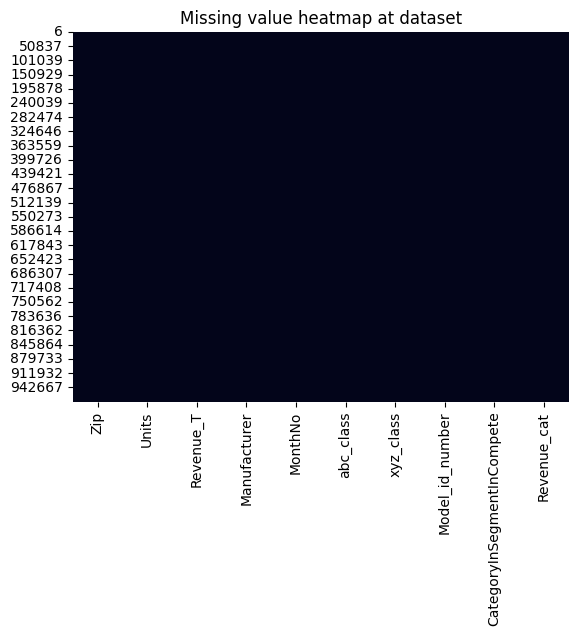

In [19]:
sns.heatmap(df.isnull(), cbar=False).set_title("Missing value heatmap at dataset")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605707 entries, 6 to 976501
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Zip                         605707 non-null  int64   
 1   Units                       605707 non-null  int64   
 2   Revenue_T                   605707 non-null  float64 
 3   Manufacturer                605707 non-null  object  
 4   MonthNo                     605707 non-null  int64   
 5   abc_class                   605707 non-null  object  
 6   xyz_class                   605707 non-null  object  
 7   Model_id_number             605707 non-null  object  
 8   CategoryInSegmentInCompete  605707 non-null  object  
 9   Revenue_cat                 605707 non-null  category
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 46.8+ MB


In [21]:
df['Revenue_cat'] = df['Revenue_cat'].astype('object')

/tmp/ipykernel_329/2363416808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue_cat'] = df['Revenue_cat'].astype('object')


In [22]:
df['abc_xyz_class'] = df['abc_class'] + df['xyz_class']
df = df.drop(['abc_class', 'xyz_class'], axis = 1)

/tmp/ipykernel_329/2648482855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abc_xyz_class'] = df['abc_class'] + df['xyz_class']


In [23]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
# удалю дубликаты
df = df.drop_duplicates()

In [25]:
# что с пропущенными значениямми
df.isnull().sum()

Zip                           0
Units                         0
Revenue_T                     0
Manufacturer                  0
MonthNo                       0
Model_id_number               0
CategoryInSegmentInCompete    0
Revenue_cat                   0
abc_xyz_class                 0
dtype: int64

In [26]:
# сохраню этот датасет
df.to_csv('df2prep4regressionV8.csv')

In [27]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.5, random_state=123)

df_train.to_csv('df2prep4regressionV8train.csv')

df_test.to_csv('df2prep4regressionV8test.csv')